In [1]:
import cv2, os, sys, time, datetime
import numpy as np
from os.path import join, dirname
from pathlib import Path
from tqdm import tqdm

SRC = '/Users/tlousk/Documents/code/blender_scripts/image_to_gp'
sys.path.append( SRC )

from cvfunctions import find_contours, find_contour_color

# CONFIGURATION
dirpath = '/Users/tlousk/Documents/test_images'

nFrames      = 10
cntLenThresh = 10
mint, maxt   = 20, 225
nlevels      = 7
stroke       = False
fill         = True
imgwidth     = 720

start = time.time()

d = Path( dirpath )
imgs = sorted([ str( f.absolute() ) for f in d.glob('*.jpg') ])[:nFrames]

pbar = tqdm( imgs, ncols = 100 )
for i, fp in enumerate( pbar ):
    im, contours = find_contours( fp, cntLenThresh, nlevels, mint, maxt, imgwidth )   

total_time = time.time() - start
timefor    = str(datetime.timedelta(seconds=total_time ))
print( f"Elapsed: {timefor} with {nlevels} levelsn" )

  0%|                                                                         | 0/1 [00:00<?, ?it/s]

ValueError: too many values to unpack (expected 2)

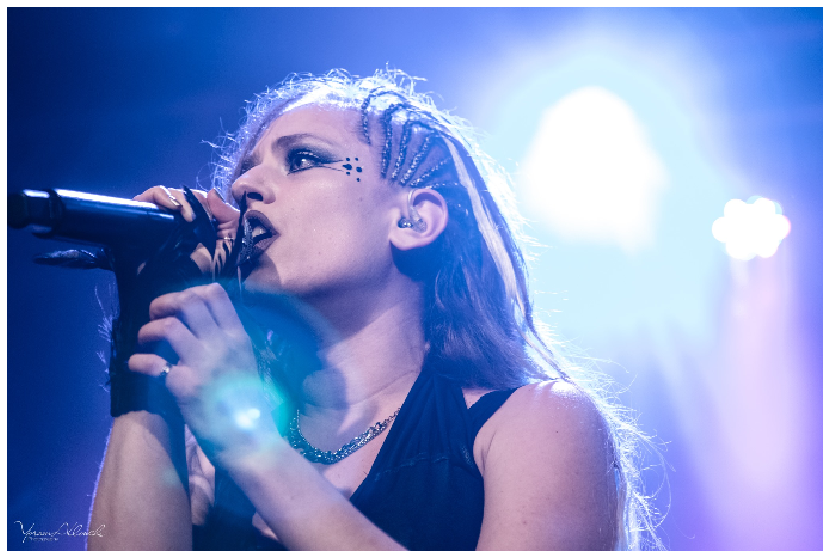

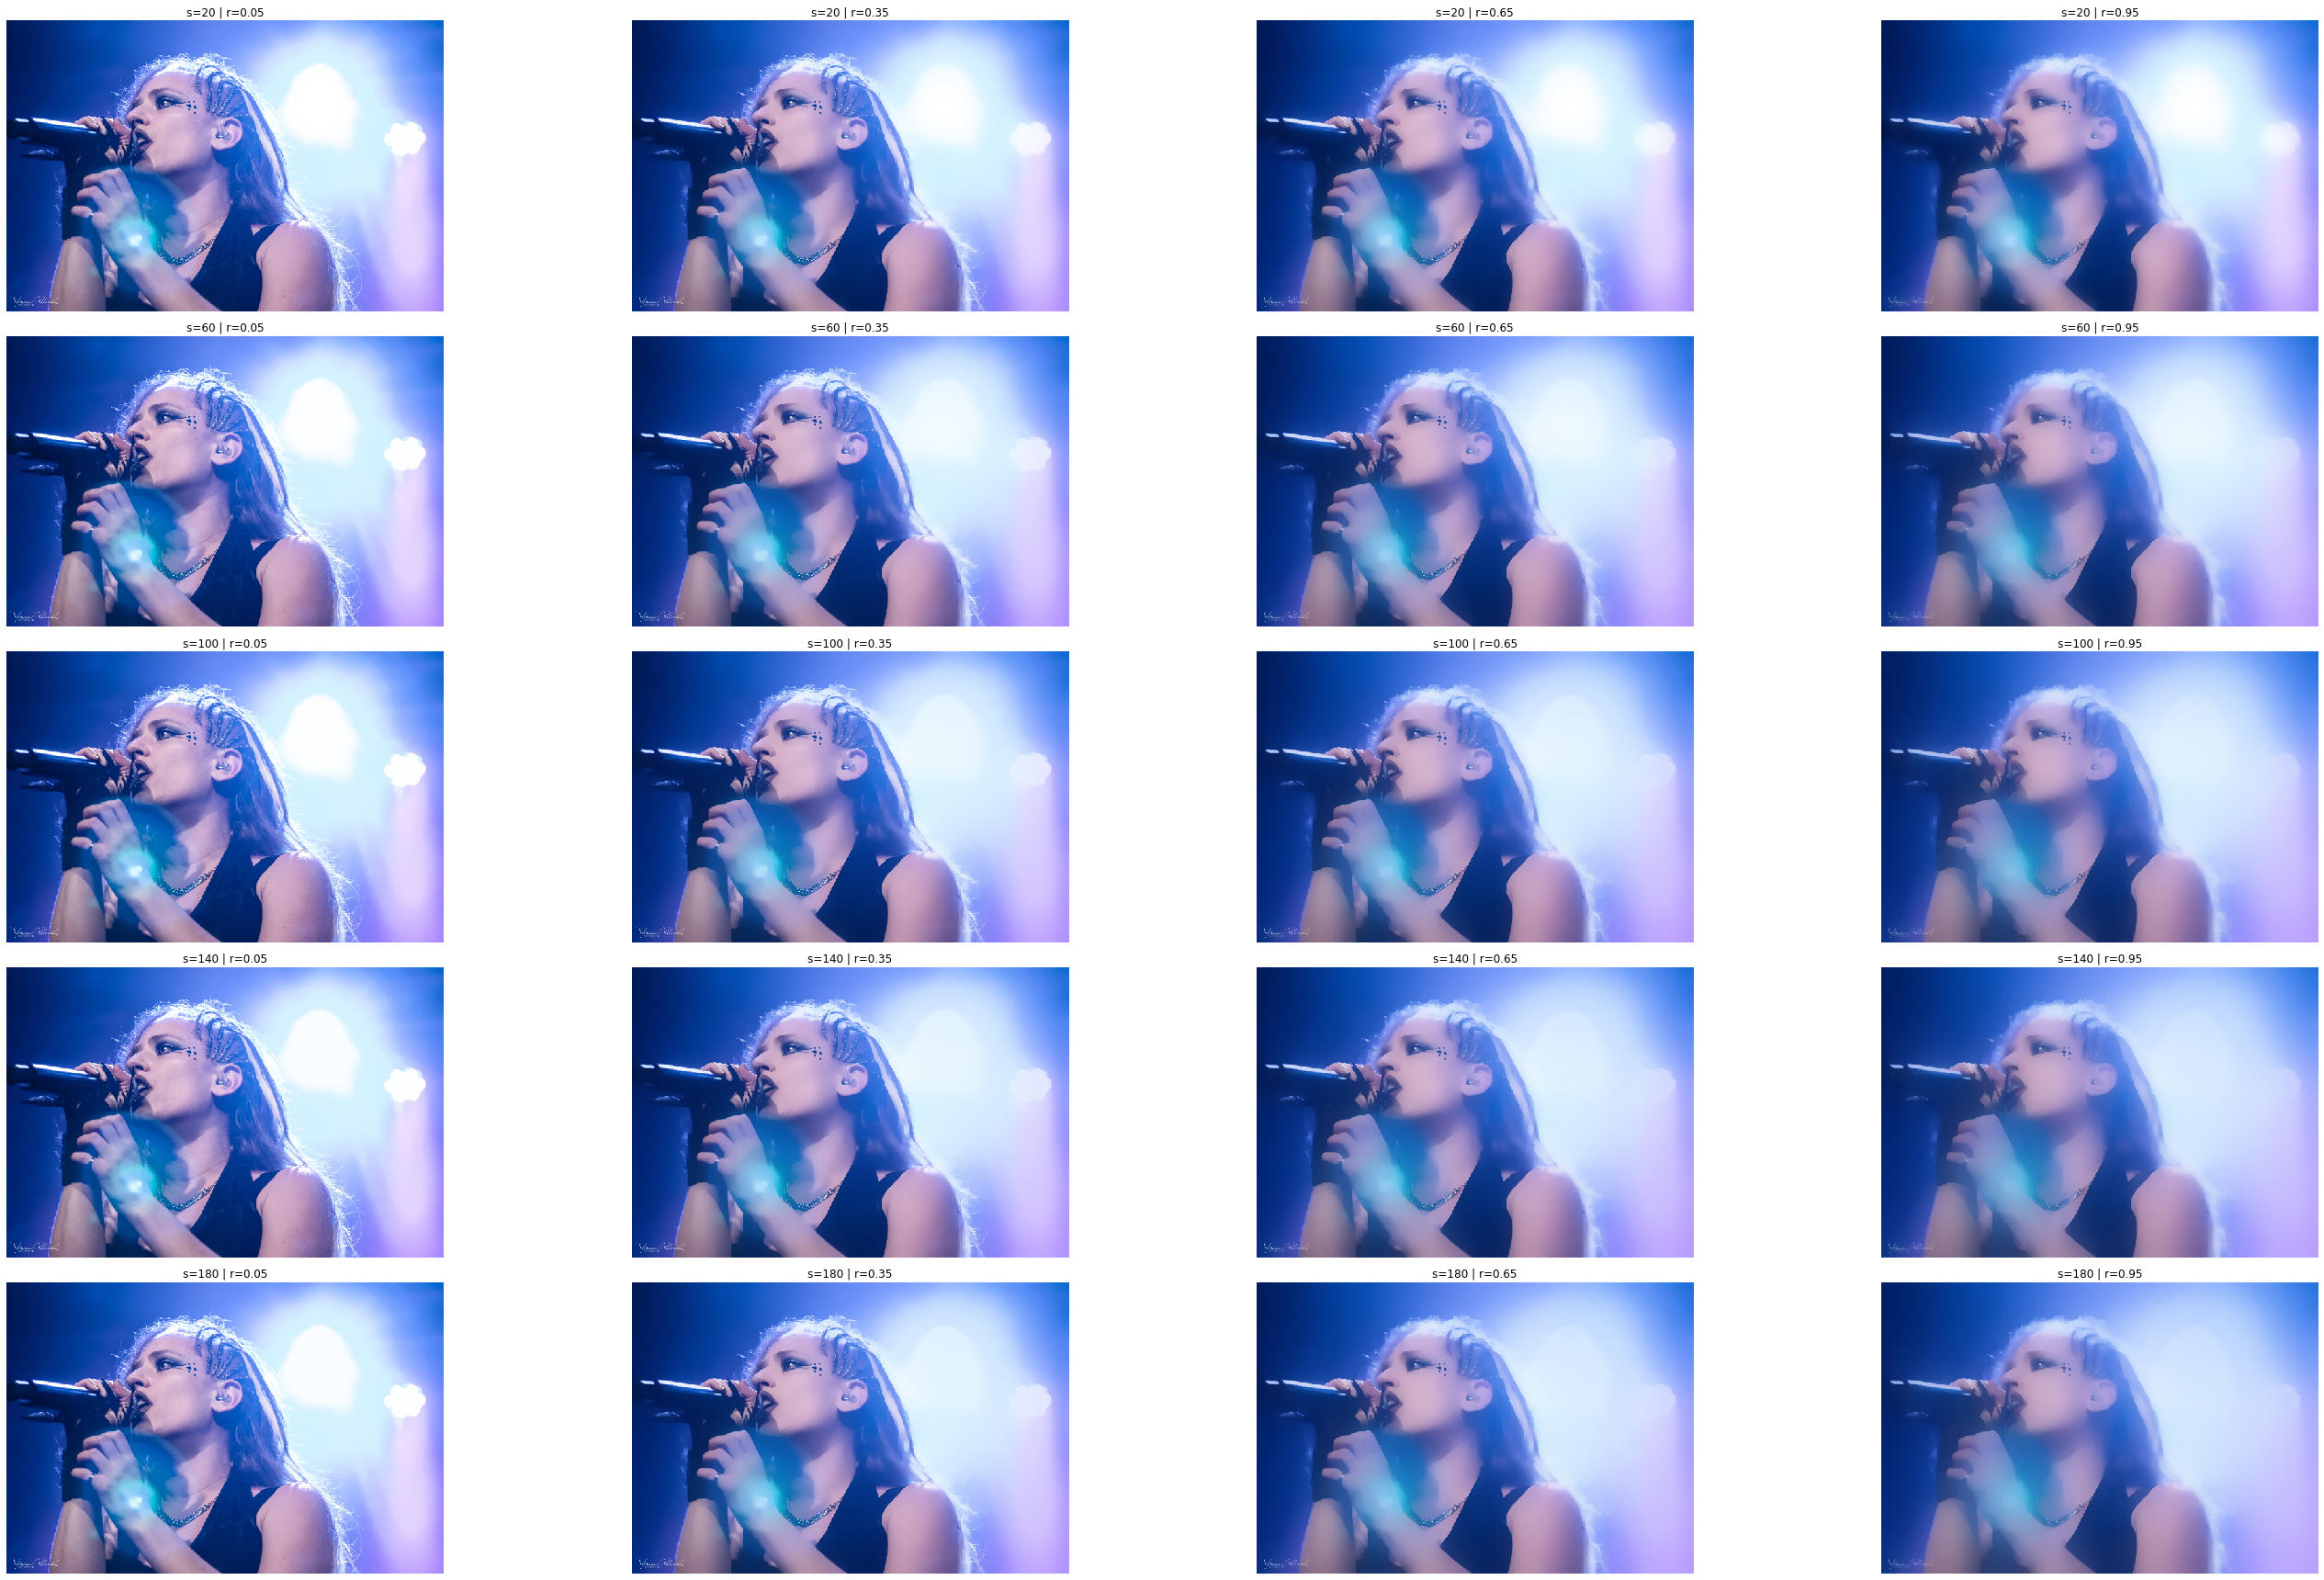

In [17]:
import cv2
import matplotlib.pyplot as plt

im  = cv2.imread( imgs[0] )

ratio    = 3
new_size = tuple([ int(round(v / ratio)) for v in [ im.shape[1], im.shape[0] ] ])
im       = cv2.resize(im, new_size )

srange = np.arange(20,181, 40)
rrange = np.linspace(0.05, 0.95, num = 4)

f, ax = plt.subplots( figsize = (20, 10) )
ax.imshow( im[:,:,::-1] )
ax.axis('off')

plt.show()

f, ax = plt.subplots( len(srange),len(rrange), figsize = (8 * len(srange), 6 * len(rrange)) )

for i, s in enumerate( srange ):
    for j, r in enumerate( rrange ):
        dst = cv2.edgePreservingFilter(im, sigma_s=s, sigma_r=r)
        a = ax[i,j]
        a.imshow( dst[:,:,::-1] )
        a.set_title( f's={s} | r={r}' )
        a.axis('off')

f.set_facecolor('white')
f.tight_layout()
plt.show()